# Fucntions

# Precptron from scratch
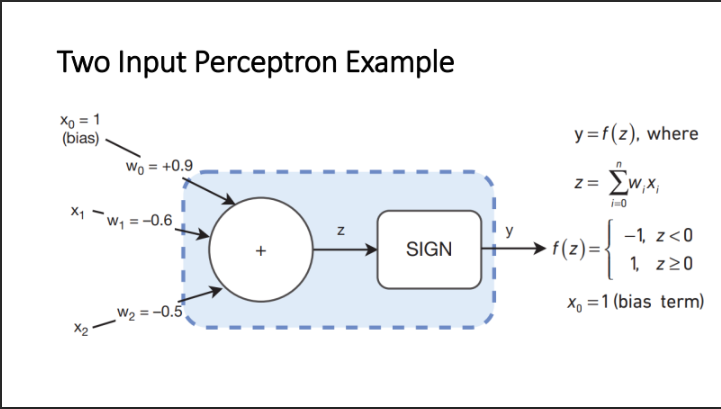

- A simple 2 input single layer perceptron implemented from scrtch 
- activation Function : Sign function
- Wieght update : Wi = Wi + (η. YActual. Xi)
- Implemented using Lists (Xtrain : List of Lists , ytrain : List)
- Target labels should be in 1/-1

# Function's description:

- fit(xtrain , ytrain , InitialWeights , epochs {default = 100} , Learning Rate{default = 0.01}) : 
 - perfroms the weighted summision for the number of epochs 
 - calls weights update 
 - returns the final weights

- updateweights(xtrain , ytrain , weights , LearningRate):
 - called by fit()
 - updates each weight using : Wi = Wi + (η. YActual. Xi)
 - returns new Weights

- predict(xtest , weights):
 - perfroms the weighted summision 
 - Returns predictions(List)
 
- plot(weights ,x , y):
 - plots data points on a 2d graph (x1,x2)
 - draws a desicion boundry using the weights
 


In [1]:

def updateweights(xtrain , y_act, weights , LR):
    new_weights = []
    for x,w in zip(xtrain , weights):
        new_weights.append(w +  (LR*y_act*x))

    return new_weights

def fit(xtrain , ytrain , weights , epochs = 100 , LR = 0.01):
    
    correct = False
    counter = 0
    while correct == False and counter < epochs  :
        preds = []
        for i,y in zip(xtrain,ytrain):
            z = 0
            for x,w in zip(i , weights):
                z += w*x

            if z > 0:    
                y_pred = 1
            else:  
                y_pred = -1
            preds.append(y_pred)
            
            if y_pred != y:
                weights = updateweights(xtrain=i , y_act=y, weights=weights , LR = LR)

        if preds == ytrain :
            correct = True
        counter+=1
    if counter >= epochs:
        print('not linearly seprable')
    return weights


def predict(xtest , weights):
    preds = []
    for i in xtest:
            z = 0
            for x,w in zip(i , weights):
                z += w*x

            if z > 0:    
                y_pred = 1
            else:  
                y_pred = -1
            preds.append(y_pred)

    return preds

import matplotlib.pyplot as plt
import numpy as np

def plot(w,x,y):
    m = -w[1] / w[2]
    b = -w[0] / w[2]

    x_values = np.linspace(-2, 2, 100)  

    y_values = m * x_values + b

    plt.plot(x_values, y_values, label='Decision Boundary', color='red')

    x_values = [point[1] for point in x]
    y_values = [point[2] for point in x]

    for i in range(len(x)):
        marker = 'x' if y[i] == 1 else 'o'
        plt.scatter(x_values[i], y_values[i], marker=marker)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundry')
    plt.legend()
    plt.grid(True)
    plt.show()


# Gates

Gate :  and
[-0.01, 0.01, 0.01]


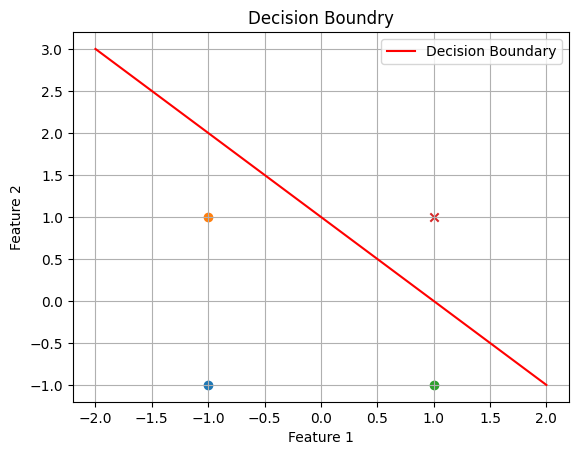

Gate :  or
[0.01, 0.01, 0.01]


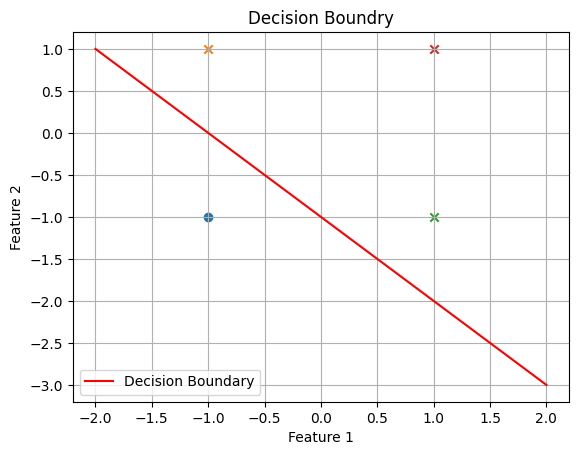

Gate :  nor
[-0.01, -0.01, -0.01]


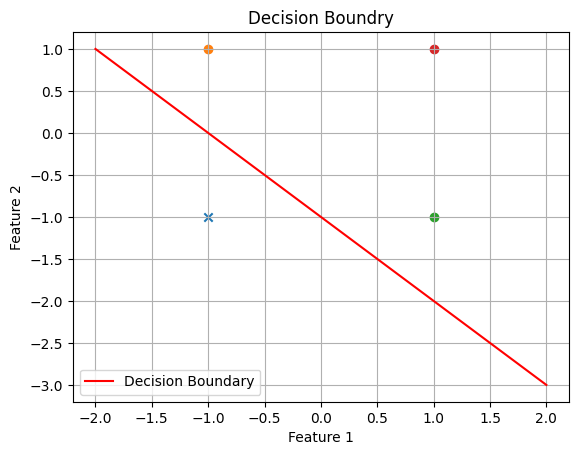

Gate :  nand
[0.01, -0.01, -0.01]


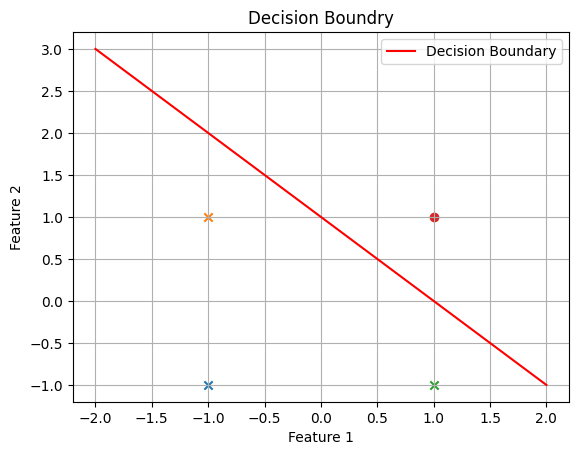

Gate :  xor
not linearly seprable
[0.01, -0.01, -0.01]


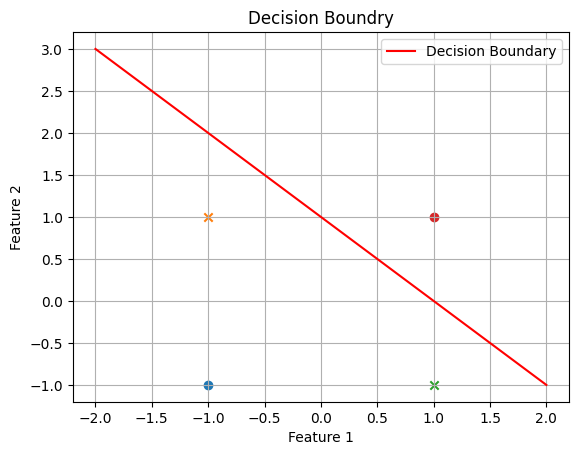

In [2]:
xtrain= [(1.0, -1.0, -1.0), 
         (1.0, -1.0, 1.0), 
         (1.0, 1.0, -1.0), 
         (1.0, 1.0, 1.0)]

OR = [-1,1,1,1]
AND  = [-1,-1,-1,1]
NOR = [1,-1,-1,-1]
NAND = [1,1,1,-1]
XOR = [-1,1,1,-1]


gates = {'and' : AND , 'or' : OR , 'nor': NOR ,'nand' : NAND  , 'xor' : XOR}

for k , v in zip(gates.keys() , gates.values()) :
    weights = [0,0,0]
    print('Gate : ' , k)
    weights = fit(xtrain=xtrain , ytrain=v , weights=weights)
    print(weights)
    plot(weights,xtrain,v)




# BMI


not linearly seprable
w0 = -4.86 , w1 = -14.33 , w2 =  0.93
train accuracy_score  0.625


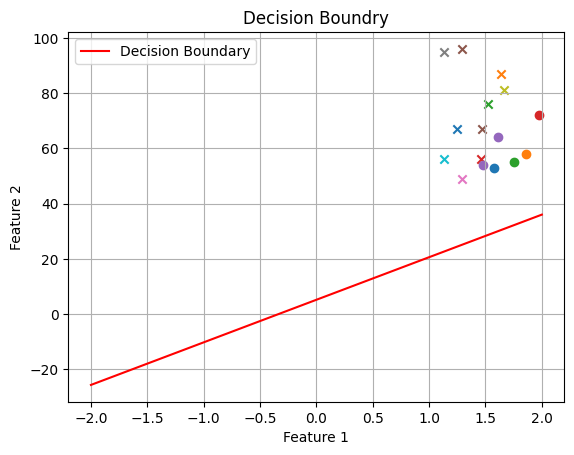

test accuracy_score  0.75


In [3]:
# might have to run this once or twice for better results
from sklearn.metrics import accuracy_score


import random
hieghts = []
wieghts = [] 
label = []

for _ in range(0,20):
    h = random.uniform(1,2)
    w = random.randint(40,100)
    hieghts.append(h)
    wieghts.append(w)

    bmi = (w/h**2)
    if bmi > 25 : 
        label.append(1)
    else:
        label.append(-1)

merged_list = [(1 , hieghts[i], wieghts[i]) for i in range(0, len(hieghts))]
weights = [0,0,0]


from sklearn.model_selection import train_test_split
xtrain ,xtest , ytrain , ytest = train_test_split(merged_list , label , train_size=0.8)


weights  = fit(xtrain=xtrain  , ytrain=ytrain , weights= weights ,epochs= 1000)
print('w0 =', '%5.2f' % weights[0], ', w1 =', '%5.2f' % weights[1], ', w2 =', '%5.2f' % weights[2])
train_preds = predict(xtrain ,weights)
print('train accuracy_score ' , accuracy_score(train_preds , ytrain))




test_preds = predict(xtest , weights)

plot(weights,xtrain , ytrain)

print('test accuracy_score '  ,accuracy_score(test_preds , ytest))
